# Real and Fake Video Detection
This application uses a Neural Networks and Deep Learning CNNs to detect real or fake videos, swapped faces.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

# Dataset

Load dataset. I used keras ImageDataGenerator to augment the data with shifts, rotations, zooms, and mirroring.

In [4]:
nbatch = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Fresh Dataset/training',
                                                 target_size=(128,128),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Fresh Dataset/test',
                                            target_size=(128,128),
                                            batch_size =nbatch,
                                            class_mode = 'binary')

Found 1732 images belonging to 2 classes.
Found 788 images belonging to 2 classes.


Text(0.5, 0, 'Class')

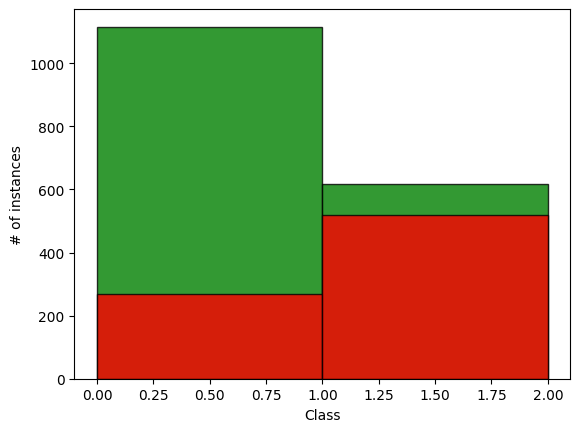

In [6]:
h1 = plt.hist(training_set.classes, bins=range(0,3), alpha=0.8, color='green', edgecolor='black')
h2 = plt.hist(test_set.classes,  bins=range(0,3), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class')

(32, 128, 128, 3) (32,)


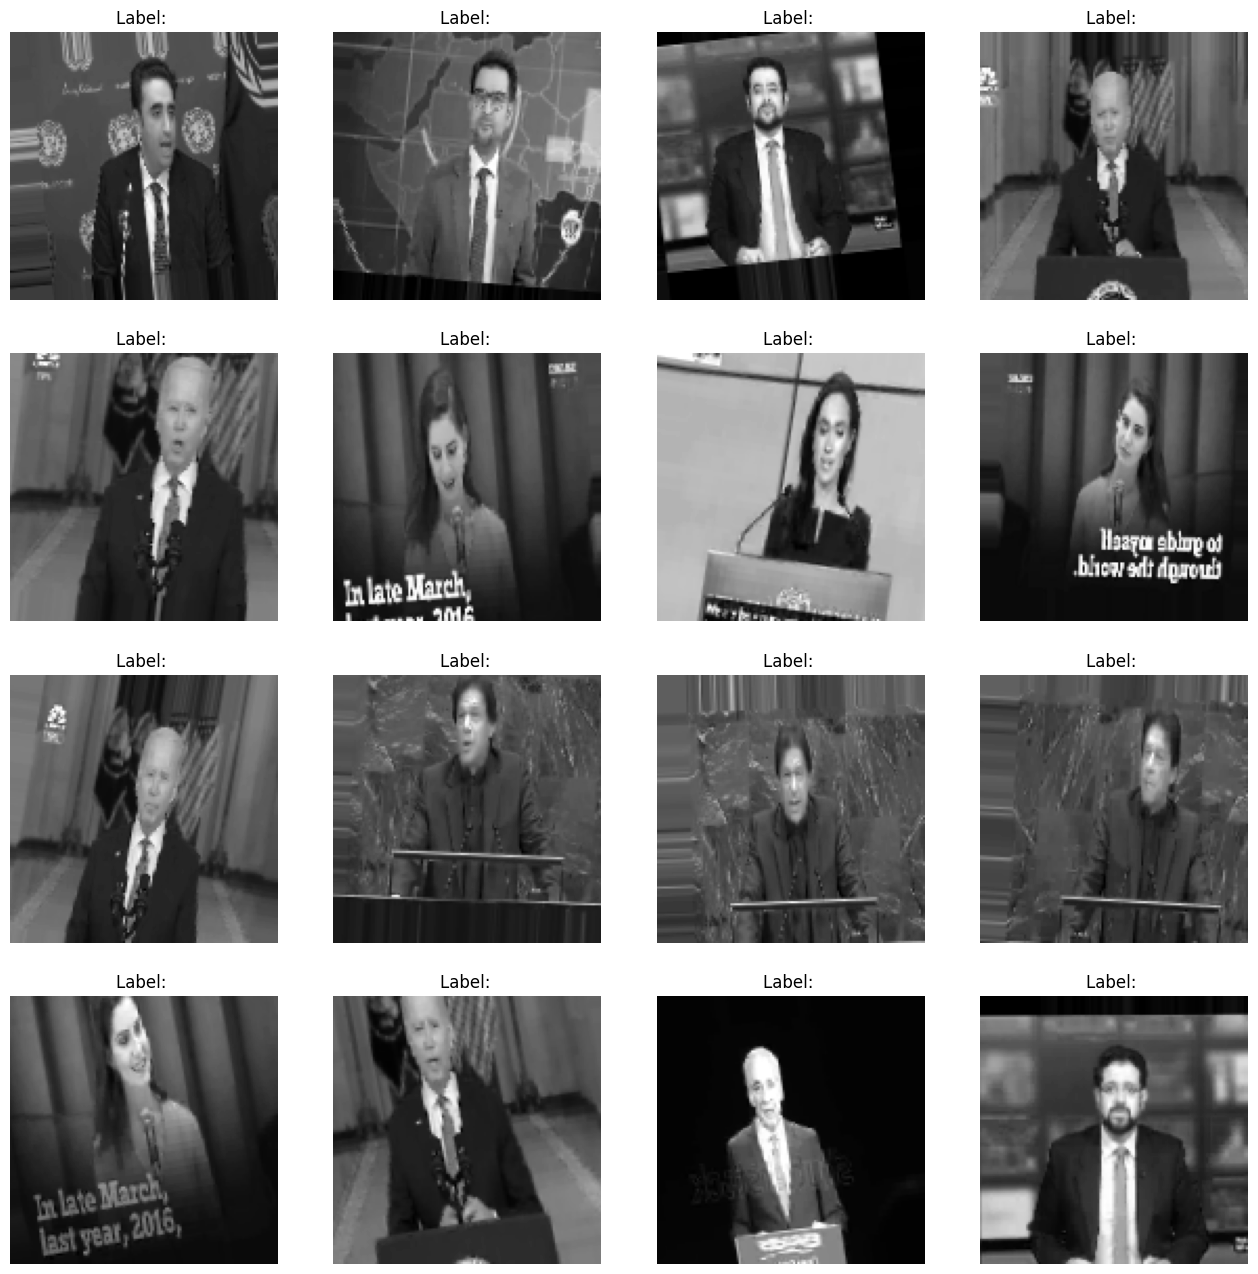

In [7]:
for X, y in training_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Label: ')
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

# Neural Networks Model / Convolutional Neural Net
I created and defined a CNN model to train and use within our application.

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(activation="relu",
                units=256))

model.add(Dense(activation="sigmoid",
                units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

##### Compile the model

In [9]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Training
We trained our model using keras. We already divied dataset images into training and testing folders.

In [10]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
]

In [11]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=28,
        epochs=10,
        validation_data=test_set,
        validation_steps=28,
        callbacks = callbacks_list
    )

<ipython-input-11-a59be482f2fe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 0.5960 - accuracy: 0.6532

28/28 [==============================] - 483s 17s/step - loss: 0.5960 - accuracy: 0.6532 - val_loss: 1.7480 - val_accuracy: 0.2576


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 0.4049 - accuracy: 0.7949

28/28 [==============================] - 92s 3s/step - loss: 0.4049 - accuracy: 0.7949
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 0.3599 - accuracy: 0.8181

28/28 [==============================] - 49s 2s/step - loss: 0.3599 - accuracy: 0.8181
Epoch 4/10
28/28 [==============================] - ETA: 0s - loss: 0.3394 - accuracy: 0.8226

28/28 [==============================] - 28s 960ms/step - loss: 0.3394 - accuracy: 0.8226
Epoch 5/10
28/28 [==============================] - ETA: 0s - loss: 0.2813 - accuracy: 0.8348

28/28 [==============================] - 16s 545ms/step - loss: 0.2813 - accuracy: 0.8348
Epoch 6/10
28/28 [==============================] - ETA: 0s - loss: 0.2865 - accuracy: 0.8145

28/28 [==============================] - 10s 349ms/step - loss: 0.2865 - accuracy: 0.8145
Epoch 7/10
28/28 [==============================] - ETA: 0s - loss: 0.2863 - accuracy: 0.8359

28/28 [==============================] - 7s 252ms/step - loss: 0.2863 - accuracy: 0.8359
Epoch 8/10
28/28 [==============================] - ETA: 0s - loss: 0.2544 - accuracy: 0.8359

28/28 [==============================] - 9s 318ms/step - loss: 0.2544 - accuracy: 0.8359
Epoch 9/10
28/28 [==============================] - ETA: 0s - loss: 0.2526 - accuracy: 0.8399

28/28 [==============================] - 6s 210ms/step - loss: 0.2526 - accuracy: 0.8399
Epoch 10/10
28/28 [==============================] - ETA: 0s - loss: 0.2394 - accuracy: 0.8329

28/28 [==============================] - 6s 208ms/step - loss: 0.2394 - accuracy: 0.8329


In [12]:
training_set.class_indices

{'fake': 0, 'real': 1}

Text(0.5, 0, '# of epochs')

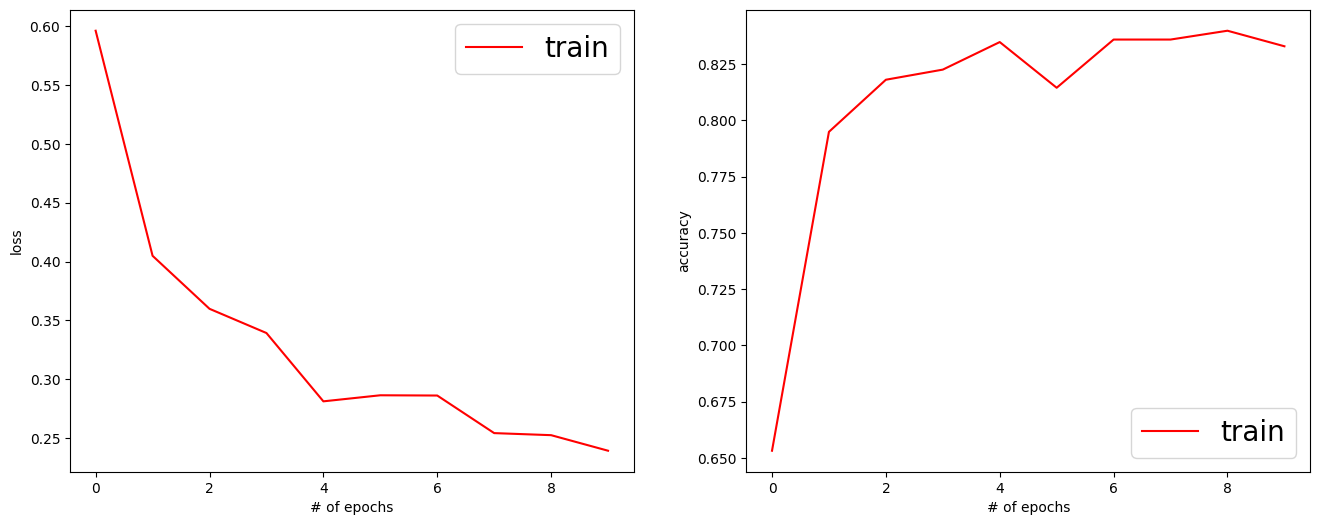

In [13]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
# plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['accuracy'],     'r-', label='train')
# plt.plot(range(nepochs), history.history['val_acc'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

# Prediction
Now the model is trained so I used some real images and edited that image so that we can analysis model is working correcly or not.

In [14]:
def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (128,128))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)

In [15]:
img = input("Enter Location of Image to predict: ")
test_image_1 = ImagePrediction(img)

KeyboardInterrupt: Interrupted by user

Enter Location of Image to predict: /content/drive/MyDrive/real_fake_faces_dataset/kaggle/for_prediction/ezgif-frame-023.jpg
1/1 [==============================] - 0s 23ms/step
Prediction:  Fake


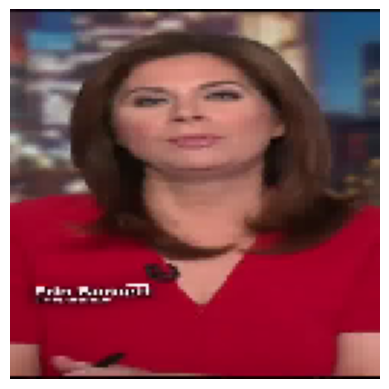

In [ ]:
img = input("Enter Location of Image to predict: ")
test_image_2 = ImagePrediction(img)

Enter Location of Image to predict: dataset/face_pred/check3.jpg
Prediction:  Real


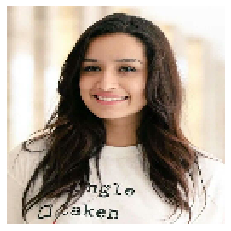

In [ ]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

Enter Location of Image to predict: dataset/face_pred/check4.jpg
Prediction:  Real


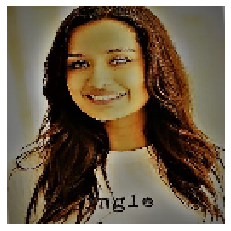

In [ ]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

## Result
3 out of 4 images is predicted correctly althrough model is not trained well by incereasing epoc near about 40 will probably make this model perfectly trained but that will require 5-6hr for training.